# 获取请求延迟分布情况

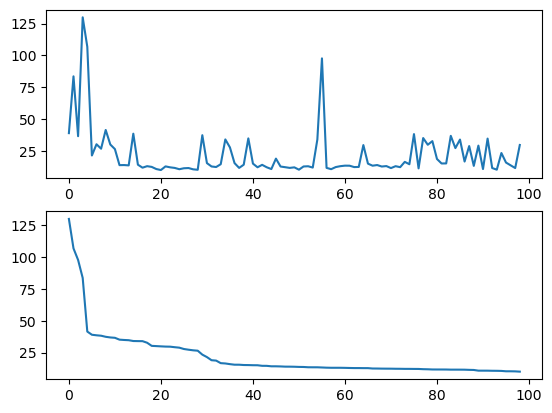

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import MultipleLocator, plot

latency = pd.read_csv('latency.csv').apply(pd.to_numeric).values.flatten()

plt.subplot(211)
plt.plot(latency)
plt.subplot(212)
plt.plot(sorted(latency, reverse=True))
plt.show()

# 用排队论模型来拟合实测数据

Fitted lambda: 4.440892098500626e-16


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4188\2287880910.py:8: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-λ * t)# 构造 ECDF 数据
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4188\2287880910.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(queue_model, latency_sorted, ecdf_values)


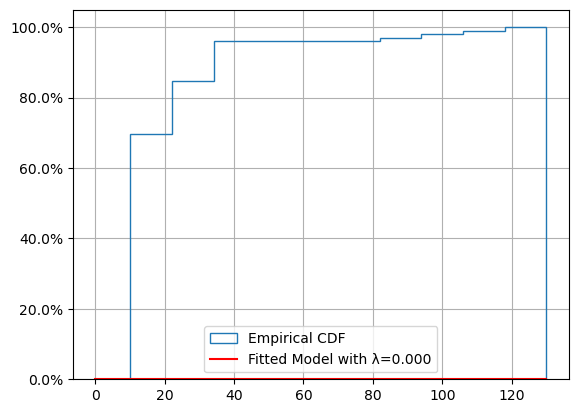

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 指数分布模型
def queue_model(t, λ):
    return 1 - np.exp(-λ * t)# 构造 ECDF 数据

# 加载延迟数据
latency = pd.read_csv('latency.csv').apply(pd.to_numeric).values.flatten()

# 构造 ECDF 数据
latency_sorted = np.sort(latency)
ecdf_values = np.arange(len(latency_sorted)) / float(len(latency_sorted))

# 非线性回归拟合模型
popt, pcov = curve_fit(queue_model, latency_sorted, ecdf_values)

# 提取最优参数
λ_opt = popt[0]
print("Fitted lambda:", λ_opt)

# 设置百分位纵轴
ax = plt.gca()
# ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=1))

# 绘制实际数据和拟合的模型
X_qt = np.linspace(0, max(latency), 1000)
Y_qt_opt = queue_model(X_qt, λ_opt)

plt.hist(latency, cumulative=True, density=True, histtype='step', label='Empirical CDF')
plt.plot(X_qt, Y_qt_opt, 'r-', label=f'Fitted Model with λ={λ_opt:.3f}')
plt.legend()
plt.grid()
plt.show()